In [1]:
import numpy as np
from PIL import Image
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import gaussian_filter

In [88]:
def downsample(img):
    return img[::2,::2, :]

def upsample(img):
    return np.kron(img, np.ones((2, 2, 1)))

def blur(img, sigma):
    return gaussian_filter(img, sigma)

def compute_laplacian_pyramid(img, L, sigma=2):
    
    gaussian_pyramid = [img]
    diff_pyramid = []

    for layer in range(L):
        layer_img = gaussian_pyramid[-1]
        
        # Downsample the image by blurring and row/column dropping
        downsampled_img = downsample(blur(layer_img, sigma))
        
        # Important! To be able to achieve a perfect reconstruction, we have to do an additional upsampling step.
        # This ensures that the diff_img will also contain the error introduced by the upsampling operation.
        # This way we are able to perfectly reconstruct the image
        upsampled_img = upsample(downsampled_img)
        
        diff_img = layer_img - upsampled_img
        
        gaussian_pyramid.append(downsampled_img)
        diff_pyramid.append(diff_img) 
        
    low_res_img = gaussian_pyramid[-1]
    
    return low_res_img, diff_pyramid
    
    
def reassemble_laplacian_pyramid(low_res_img, diff_pyramid):

    curr_layer = low_res_img
    for diff_img in diff_pyramid[::-1]:
        upsampled_layer = upsample(curr_layer)
        curr_layer = diff_img + upsampled_layer
        
    # Ensure that the final image is again an int matrix with values between 0 and 255
    final_img = curr_layer.astype(int)
    
    return final_img
    

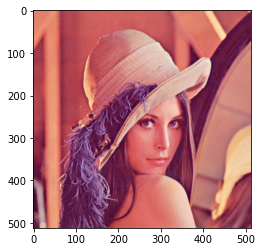

In [89]:
orig_img = np.array(Image.open('lena.png'))
plt.imshow(orig_img)

In [90]:
low_res_img, diff_pyramid = compute_laplacian_pyramid(orig_img, 3)
reassembled_img = reassemble_laplacian_pyramid(low_res_img, diff_pyramid)

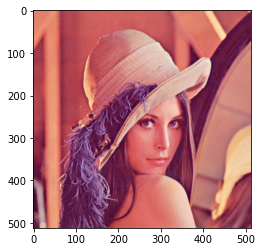

In [91]:
plt.imshow(reassembled_img)

In [93]:
pix_diff_error = (orig_img - reassembled_img).sum()
print('Pixel Difference Error: ', pix_diff_error)

Pixel Difference Error:  0
